# Company Z Case Study

As part of the Supply Chain Management and Logistics Network Design course - Master's degree in Management Engineering - University of Bergamo

(c) Prof. Roberto Pinto

**This notebook contains all the data and functions required by the Company Z case study. To use this notebook, please refer to the documentation provided during the course**

In [5]:
# Import functions
from netopt import netopt, print_solution, plot_map
from data_structures import (show_data, show_geo_map, set_capacity, set_all_capacities, set_fixed_cost,
                             set_all_fixed_costs, scale_demand, scale_all_demands, set_demand,
                             set_all_demands, calculate_dm, show_assignments, get_demand, get_capacity)

# Import data
# The variable customers_as_is contains the existing customers, while the variable customers_after_merge contains both
# existing and future customers after the acquisition

# The variable warehouses_as_is contains the Company's Z existing facilities, whereas
# the variable warehouses_after_merge contains all the facilities from Company Z and Company Y
# Finally, the variable warehouses_after_merge_plus_alternatives contains all the facilities from Company Z and Company Y 
# plus some other alternatives. In particular, the facilities Bergamo_extended and Verona_extended should be
# considered as the versions with higher capacity of the Bergamo and Verona facilities, respectively

from data.projectwork22_23_data import warehouses_as_is, warehouses_after_merge, warehouses_after_merge_plus_alternatives, customers_as_is, customers_after_merge


In [20]:
# Once variables are imported, you can use and display
# Explore the aggregated data 
print(f"TOTAL DEMAND FROM EXISTING CUSTOMERS: {get_demand(customers=customers_as_is)} pallets")
print(f"TOTAL CAPACITY EXISTING NETWORK: {get_capacity(warehouses=warehouses_as_is)} pallets")

TOTAL DEMAND FROM EXISTING CUSTOMERS: 10867.0 pallets
TOTAL CAPACITY EXISTING NETWORK: 12900.0 pallets


In [21]:
# Dispaly more details
show_data(warehouses_after_merge_plus_alternatives)

|    |   Id | Identifier       | City             |   Latitude |   Longitude |   Capacity |   Yearly fixed cost |
|---:|-----:|:-----------------|:-----------------|-----------:|------------:|-----------:|--------------------:|
|  0 |    0 | Bergamo          | Bergamo          |    45.695  |      9.67   |       4800 |              100000 |
|  1 |    1 | Genoa            | Genoa            |    44.4072 |      8.934  |       5300 |              123000 |
|  2 |    2 | Piacenza         | Piacenza         |    45.05   |      9.7    |       2800 |               60000 |
|  3 |    3 | Padova           | Padova           |    45.4064 |     11.8778 |       4700 |              100000 |
|  4 |    4 | Novara           | Novara           |    45.45   |      8.6167 |       2200 |               90000 |
|  5 |    5 | Verona           | Verona           |    45.4386 |     10.9928 |       4500 |               50000 |
|  6 |    6 | Milan            | Milan            |    45.4669 |      9.19   |       800

In [17]:
# Visualize the data. You can move the map with the mouse and click on the icons for information about the location
show_geo_map(customers=customers_as_is, warehouses=warehouses_as_is, zoom=8)

In [7]:
# The functions available are the following:
# calculate_dm() - calculates the distance matrix between origins and destinations
# netopt() - solves the optimization model
# set_capacity() - changes the capacity of a warehouse
# set_all_capacities() - changes the capacity of all warehouses
# set_fixed_cost() - changes the yearly fixed cost of a warehouse
# set_all_fixed_costs() - changes the yearly fixed cost of all warehouses
# scale_demand() - scales the demand of a customer by a factor
# scale_all_demands() - scales the demand of all customer by a factor
# set_demand() - changes the demand of a customer
# set_all_demands() - changes the demand of all customers
# print_solution() - prints detail of the solution
# plot_map() - plots the map of customers and warehouses
# show_geo_map() - plots the map of customers and warehouses on a geographic map
# show_assignments() - displays the assignements in tabular form
# show_data() - shows the data in tabular form
# get_demand() - returns the total demand of a set of customers
# get_capacity() - returns the total capacity of a set of warehouses


# Type the function name without parentheses and preceeded by ? to access a short description of the function and the parameters
# Example:
?netopt

In [13]:
# In order to use the netopt function, you need to compute the distance matrices
# The distance matrixes are necessary for the model: if you change the data, you should calculate the matrices again
dist_as_is = calculate_dm(warehouses=warehouses_as_is, customers=customers_as_is)
dist_after_merge = calculate_dm(warehouses=warehouses_after_merge, customers=customers_after_merge)
dist_after_merge_plus_alternatives = calculate_dm(warehouses=warehouses_after_merge_plus_alternatives, customers=customers_after_merge)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Total cost: 359317.0
Cost splitting:
- Transportation cost: 76317.0
- Yearly fixed cost: 283000.0

Open warehouses:
ID:   0 City: Bergamo              State:        Num. customers:   8  Outflow:      4750.0 units
ID:   1 City: Genoa                State:        Num. customers:   5  Outflow:      4425.0 units
ID:   2 City: Piacenza             State:        Num. customers:   2  Outflow:      1692.0 units

Total outflow: 10867.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 192.52184359332463
Average customers distance (no weights): 72.76351762067544


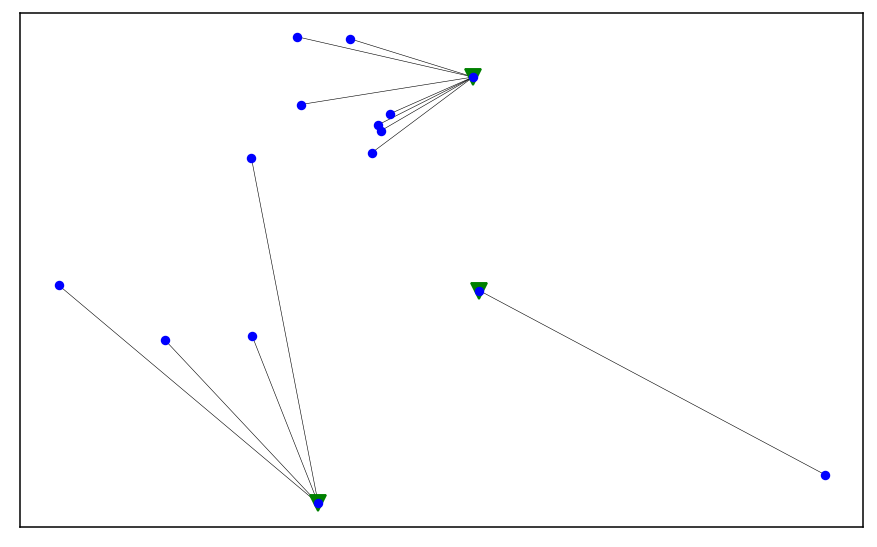

{   'active_warehouses_id': {0, 1, 2},
    'active_warehouses_name': ['Bergamo', 'Genoa', 'Piacenza'],
    'avg_customer_distance': 72.76351762067544,
    'avg_weighted_distance': 70.22783238592308,
    'customers_assignment': [   {   'Customer': 'Milan',
                                    'Customer Demand': 2300.0,
                                    'Customer_id': 0,
                                    'Customers Latitude': 45.4669,
                                    'Customers Longitude': 9.19,
                                    'Distance': 58.94729924738405,
                                    'Warehouse': 'Bergamo',
                                    'Warehouse Latitude': 45.695,
                                    'Warehouse Longitude': 9.67,
                                    'Warehouse_id': 0},
                                {   'Customer': 'Monza',
                                    'Customer Demand': 124.0,
                                    'Customer_id': 4,
        

In [15]:
# The following command "solves" the as-is scenario before the merging
# You can play with the arguments to address your case

results = netopt(num_warehouses=3,
                 warehouses=warehouses_as_is,
                 customers=customers_as_is,
                 distance=dist_as_is,
                 objective='mincost',
                 distance_ranges=[],
                 high_service_distance=None,
                 avg_service_distance=None,
                 max_service_distance=None,
                 force_single_sourcing=True,
                 force_uncapacitated=False,
                 force_allocations=[],
                 force_open=[],
                 force_closed=[],
                 ignore_fixed_cost=False,
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8,
                 hide_inactive=True)
print_solution(results)

In [16]:
# Visualize the results in table form
show_assignments(results)

|    |   Warehouse_id | Warehouse   |   Customer_id | Customer           |   Customer_demand |   Distance |
|---:|---------------:|:------------|--------------:|:-------------------|------------------:|-----------:|
|  0 |              0 | Bergamo     |             0 | Milan              |              2300 |    58.9473 |
|  1 |              0 | Bergamo     |             4 | Monza              |               124 |    45.7398 |
|  2 |              0 | Bergamo     |             5 | Bergamo            |              1521 |     0      |
|  3 |              0 | Bergamo     |             9 | Busto Arsizio      |                83 |    91.4347 |
|  4 |              0 | Bergamo     |            10 | Como               |               283 |    66.1475 |
|  5 |              0 | Bergamo     |            11 | Sesto San Giovanni |               182 |    51.6966 |
|  6 |              0 | Bergamo     |            12 | Varese             |                81 |    93.9907 |
|  7 |              0 | Berg